In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports and toolboxes needed for workflow
# System imports
import os
import sys

# Mathematical imports
import numpy as np
import math

# To make this notebook's output stable across runs
np.random.seed(42)

# Data structure imports
import csv
import glob
from collections import Counter # https://docs.python.org/2/library/collections.html
import re
import pandas as pd
from pandas import set_option
set_option('display.max_columns',400)


# Machine Learning and Statistical imports
import scipy
from sklearn.cluster import KMeans

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"


# Visualization imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import image as img
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams['figure.figsize'] = (100,100)

import seaborn as sns

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.plotting import figure
output_notebook()

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGE_ID = "EDA_Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", IMAGE_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    
# Ignore useless warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)


Loading BokehJS ...

In [2]:
import pandas as pd
pd.options.display.max_rows = 999

In [3]:
import pandas_profiling

In [4]:
from pandas.api.types import CategoricalDtype

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from vecstack import stacking

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB


import tensorflow as tf

import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.tree import export_graphviz
tf.debugging.set_log_device_placement(True)


import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow.compat.v2.feature_column as fc

import re

from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import matplotlib.pyplot as plt # For making plots

import seaborn as sns # Makes beautiful plots
from sklearn.preprocessing import StandardScaler # Testing sklearn
import tensorflow # Imports tensorflow
import keras # Imports keras

from tensorflow.python.platform import build_info as tf_build_info
print(tf_build_info.cuda_version_number)
# 9.0 in v1.10.0
print(tf_build_info.cudnn_version_number)
# 7 in v1.10.0

from tensorflow.python.client import device_lib

device_lib.list_local_devices()

import matplotlib.pyplot as plt
%matplotlib inline


import datetime, os

from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

from sklearn.model_selection import train_test_split

from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout

from keras.applications import Xception
from keras.utils import multi_gpu_model

import tkinter
import matplotlib

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

import time

import psutil

from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

2.0.0
Num GPUs Available:  3
10.0
7.6


Using TensorFlow backend.


In [5]:
df = pd.read_excel ('Combined2.xlsx', sheet_name='Sheet1')
print (df)

     D-U-N-S@ Number                Company Name                        URL  \
0        06-070-4780                  APPLE INC.              WWW.APPLE.COM   
1        00-134-4746          FORD MOTOR COMPANY     WWW.CORPORATE.FORD.COM   
2        83-244-7812      GENERAL MOTORS COMPANY                 WWW.GM.COM   
3        00-136-7960    GENERAL ELECTRIC COMPANY                 WWW.GE.COM   
4        00-925-6819          THE BOEING COMPANY             WWW.BOEING.COM   
...              ...                         ...                        ...   
9982     84-089-1001   DYNCORP INTERNATIONAL LLC           WWW.DYN-INTL.COM   
9983     87-626-2692     FRISBY TECHNOLOGIES INC                              
9984     07-922-2918   GLOBAL CLEAN ENERGY, INC.  WWW.GLOBALCLEANENERGY.NET   
9985     96-576-3928    HERE HOLDING CORPORATION               WWW.HERE.COM   
9986     12-747-1647  VERIZON WASHINGTON, DC INC            WWW.VERIZON.COM   

      Founding          EIN Country                

In [6]:
data = df

In [7]:
data.head()

,D-U-N-S@ Number,Company Name,URL,Founding,EIN,Country,State,SIC,Employees,Year3 Total Assets,Year2 Total Assets,Year1 Total Assets,AVGTA,Year3 Current Assets,Year2 Current Assets,Year1 Current Assets,AVGCA,Year3 Total Liabilities,Year2 Total Liabilities,Year1 Total Liabilities,AVGTL,Year3 Long Term Debt,Year2 Long Term Debt,Year1 Long Term Debt,AVGLTD,Year3 Current Liabilities,Year2 Current Liabilities,Year1 Current Liabilities,AVGCL,Year3 Total Revenue,Year2 Total Revenue,Year1 Total Revenue,AVGR,Year3 EBITDA,Year2 EBITDA,Year1 EBITDA,AVGEBITDA,Year3 Operating Income,Year2 Operating Income,Year1 Operating Income,AVGOI,Year3 Net Income,Year2 Net Income,Year1 Net Income,AVGNI,Year3 Cash from Operations,Year2 Cash from Operations,Year1 Cash from Operations,AVGCashOp,Year3 Cash from Investing,Year2 Cash from Investing,Year1 Cash from Investing,AVGCashInv,Year3 Cash from Financing,Year2 Cash from Financing,Year1 Cash from Financing,AVGCashFin,Year3 Capital Expenditures,Year2 Capital Expenditures,Year1 Capital Expenditures,AVGCAPEX,"Year3 Cash & Cash Equivalents, Beginning of Year","Year2 Cash & Cash Equivalents, Beginning of Year","Year1 Cash & Cash Equivalents, Beginning of Year",AVGCASHBEGIN,"Year3 Cash & Cash Equivalents, End of Year","Year2 Cash & Cash Equivalents, End of Year","Year1 Cash & Cash Equivalents, End of Year",AVGCASHEND,AVGCASHYEAR,Year3GM,Year2GM,Year1GM,AVGGM,Year3 COS,Year2 COS,Year1 COS,AVGCOS,Year3 GP,Year2 GP,Year1 GP,AVGGP,Year3 SGA,Year2 SGA,Year1 SGA,AVGSGA,Year3 OM,Year 2 OM,Year 1 OM,AVGOM,Year3 EBITDA Margin %,Year2 EBITDA Margin %,Year1 EBITDA Margin %,AVGEBITDAM,Year3 Calculated Tax Rate %,Year2 Calculated Tax Rate %,Year1 Calculated Tax Rate %,Year3 Quick Ratio,Year2 Quick Ratio,Year1 Quick Ratio,Year3 Current Ratio,Year2 Current Ratio,Year1 Current Ratio,Year3 Net Current Assets as % of Total Assets,Year2 Net Current Assets as % of Total Assets,Year1 Net Current Assets as % of Total Assets,Year3 Revenue to Assets,Year2 Revenue to Assets,Year1 Revenue to Assets
0,06-070-4780,APPLE INC.,WWW.APPLE.COM,1977.0,942404110.0,USA,CALIFORNIA,3663,3663996.0,3.753190e+11,3.657250e+11,3.385160e+11,3.598533e+11,1.286450e+11,1.313390e+11,1.628190e+11,1.409343e+11,2.412720e+11,2.585780e+11,2.480280e+11,2.492927e+11,9.720700e+10,9.373500e+10,9.180700e+10,9.424967e+10,1.008140e+11,1.168660e+11,1.057180e+11,1.077993e+11,2.292340e+11,2.655950e+11,2.601740e+11,2.516677e+11,7.136800e+10,8.136000e+10,7.689900e+10,7.654233e+10,6.134400e+10,7.089800e+10,6.393000e+10,6.539067e+10,4.835100e+10,5.953100e+10,5.525600e+10,5.437933e+10,6.359800e+10,7.743400e+10,6.939100e+10,7.014100e+10,-4.644600e+10,1.606600e+10,4.589600e+10,5.172000e+09,-1.734700e+10,-8.787600e+10,-9.097600e+10,-6.539967e+10,1.245100e+10,1.331300e+10,1.049500e+10,1.208633e+10,2.048400e+10,2.028900e+10,2.591300e+10,2.222867e+10,2.028900e+10,2.591300e+10,5.022400e+10,3.214200e+10,2.718533e+10,0.3847,0.3834,0.3782,0.382100,8.818632e+10,1.018291e+11,9.839781e+10,9.613775e+10,1.410477e+11,1.637659e+11,1.617762e+11,1.555299e+11,7.970368e+10,9.286788e+10,9.784619e+10,9.013925e+10,0.2676,0.2669,0.2457,0.260067,0.3113,0.3063,0.2956,0.304400,0.2456,0.1834,0.1594,1.09,0.99,1.38,1.28,1.12,1.54,0.0742,0.0396,0.1687,0.61,0.73,0.77
1,00-134-4746,FORD MOTOR COMPANY,WWW.CORPORATE.FORD.COM,1903.0,383364381.0,USA,MICHIGAN,3711,37111.0,2.379510e+11,2.578080e+11,2.565400e+11,2.507663e+11,1.084610e+11,1.159020e+11,1.146490e+11,1.130040e+11,2.087810e+11,2.229180e+11,2.206080e+11,2.174357e+11,9.330100e+10,1.026660e+11,1.007200e+11,9.889567e+10,9.028100e+10,9.460000e+10,9.556900e+10,9.348333e+10,1.518000e+11,1.567760e+11,1.603380e+11,1.563047e+11,1.028300e+10,1.260600e+10,1.016300e+10,1.101733e+10,4.116000e+09,4.813000e+09,3.203000e+09,4.044000e+09,4.596000e+09,7.602000e+09,3.677000e+09,5.291667e+09,1.979200e+10,1.809600e+10,1.502200e+10,1.763667e+10,-2.535200e+10,-1.939200e+10,-1.626100e+10,-2.033500e+10,7.458000e+09,3.394000e+09,-1.220000e+08,3.576667e+09,6.992000e+09,7.049000e+09,

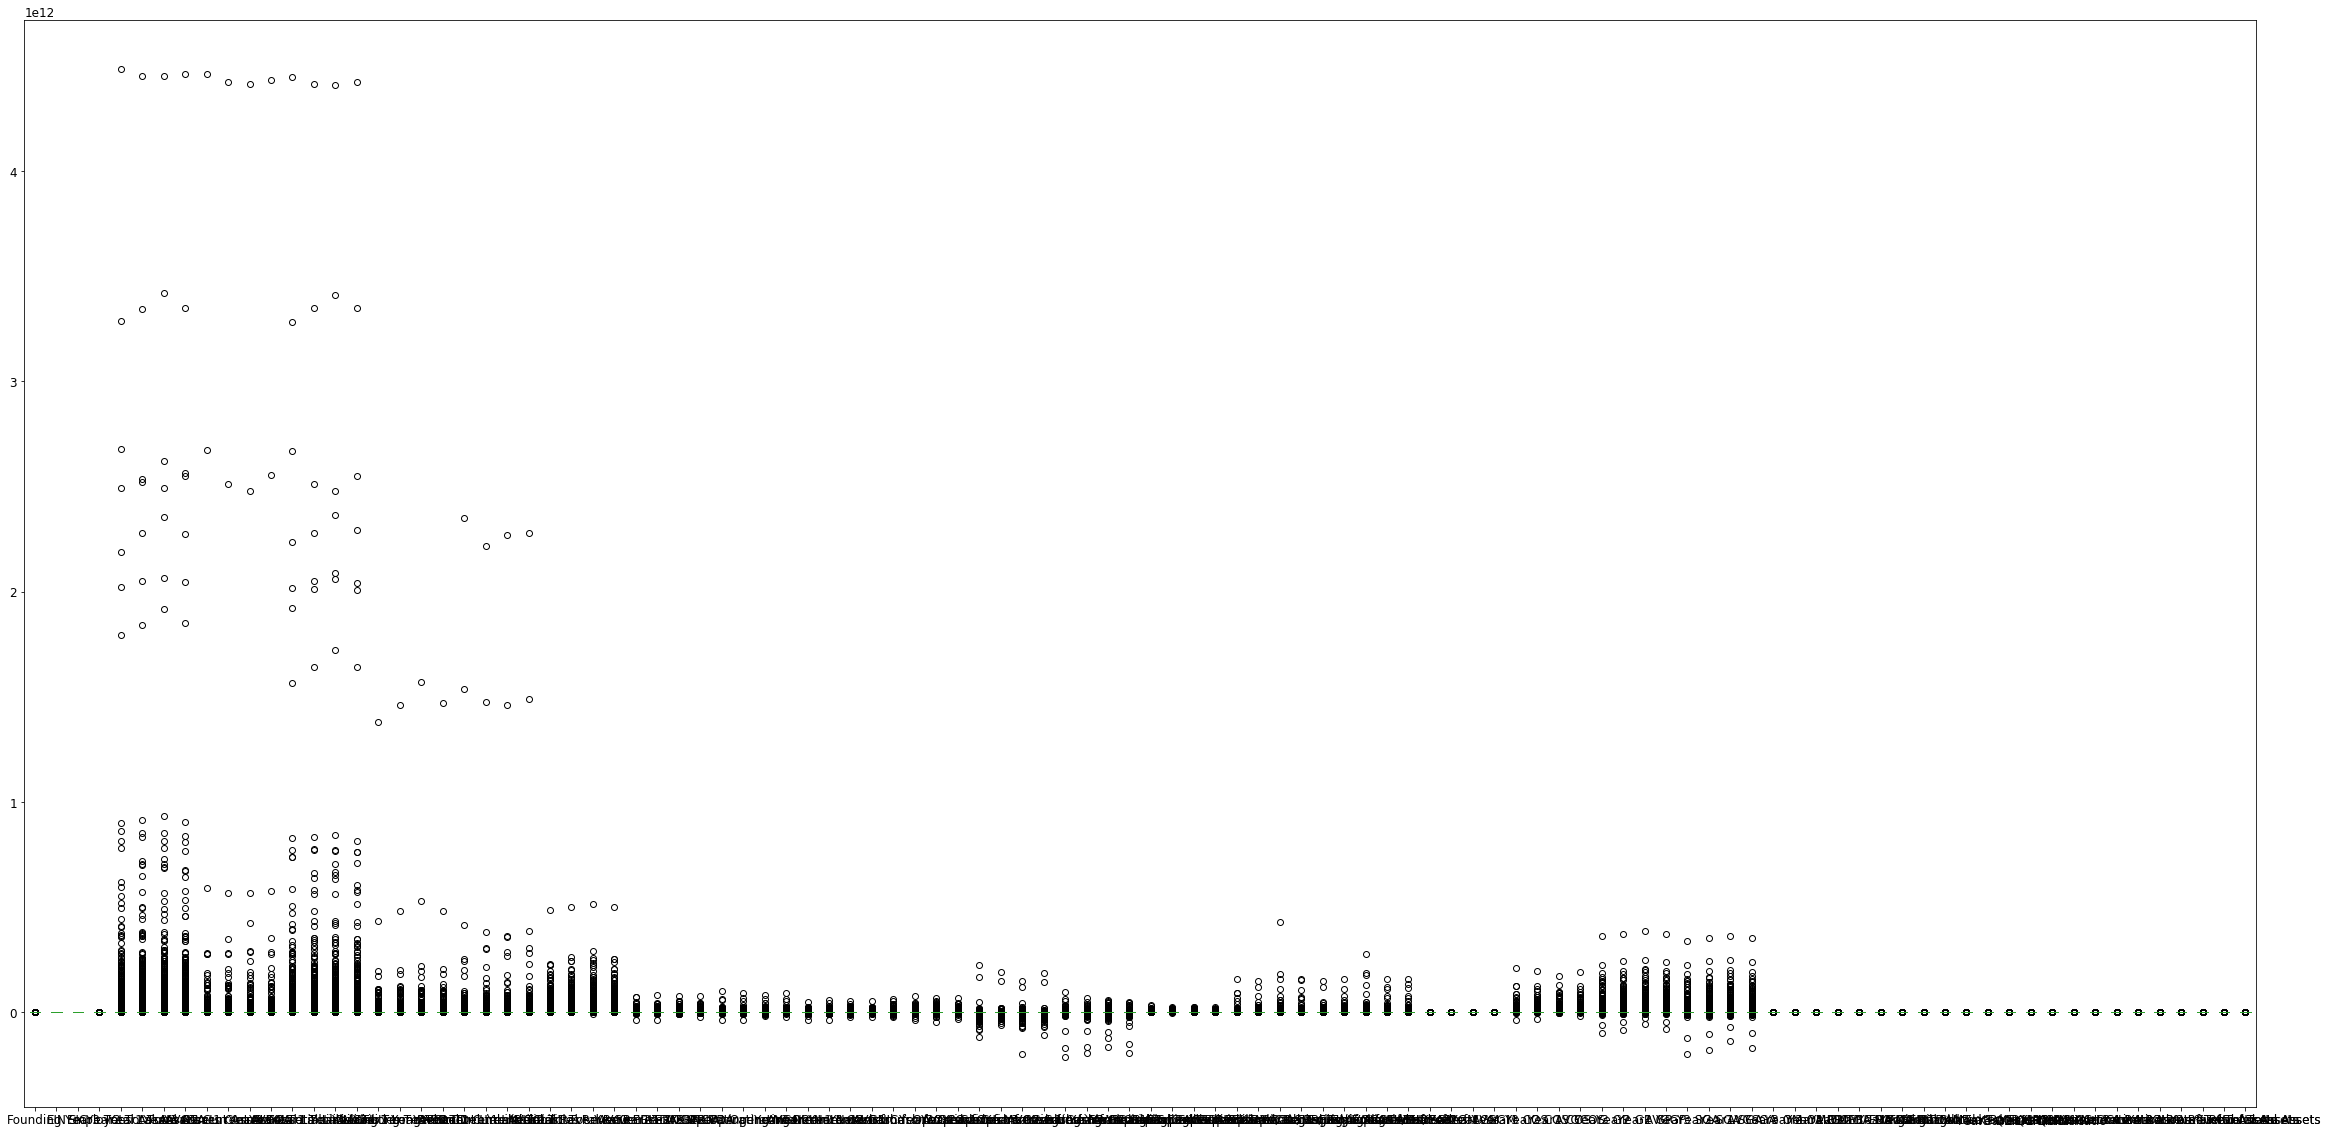

In [8]:
data.boxplot(grid = False,figsize=(40,20)) #figsize=(Width,Height)

In [9]:
y = data['AVGOM']

In [10]:
y.unique()

array([ 0.26006667,  0.02593333,  0.05213333, ..., -0.63263333,
        0.26656667,  0.2404    ])

In [11]:
profile = pandas_profiling.ProfileReport(data)

In [12]:
profile

Number of variables,109
Number of observations,9987
Total Missing (%),5.0%
Total size in memory,8.3 MiB
Average record size in memory,872.0 B
Numeric,40
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,65


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Columns: 109 entries, D-U-N-S@ Number to Year1 Revenue to Assets
dtypes: float64(103), int64(1), object(5)
memory usage: 8.3+ MB


In [14]:
data.isnull().sum()

D-U-N-S@ Number                                        0
Company Name                                           0
URL                                                    0
Founding                                             332
EIN                                                 2813
Country                                                0
State                                                  0
SIC                                                    0
Employees                                            207
Year3 Total Assets                                   559
Year2 Total Assets                                   203
Year1 Total Assets                                    74
AVGTA                                                 33
Year3 Current Assets                                1994
Year2 Current Assets                                1700
Year1 Current Assets                                1587
AVGCA                                               1526
Year3 Total Liabilities        

In [15]:
data.dtypes

D-U-N-S@ Number                                      object
Company Name                                         object
URL                                                  object
Founding                                            float64
EIN                                                 float64
Country                                              object
State                                                object
SIC                                                   int64
Employees                                           float64
Year3 Total Assets                                  float64
Year2 Total Assets                                  float64
Year1 Total Assets                                  float64
AVGTA                                               float64
Year3 Current Assets                                float64
Year2 Current Assets                                float64
Year1 Current Assets                                float64
AVGCA                                   

In [16]:
data.EIN.astype("object")
#data.Employees.astype("float64")

0       9.42404e+08
1       3.83364e+08
2       2.70756e+08
3       1.40689e+08
4       1.32957e+08
           ...     
9982    5.22287e+08
9983            NaN
9984            NaN
9985     7.7017e+08
9986            NaN
Name: EIN, Length: 9987, dtype: object

In [17]:
data.Founding.astype("object")

0       1977
1       1903
2       1908
3       1892
4       1916
        ... 
9982     NaN
9983     NaN
9984     NaN
9985     NaN
9986     NaN
Name: Founding, Length: 9987, dtype: object

In [18]:
data.dtypes

D-U-N-S@ Number                                      object
Company Name                                         object
URL                                                  object
Founding                                            float64
EIN                                                 float64
Country                                              object
State                                                object
SIC                                                   int64
Employees                                           float64
Year3 Total Assets                                  float64
Year2 Total Assets                                  float64
Year1 Total Assets                                  float64
AVGTA                                               float64
Year3 Current Assets                                float64
Year2 Current Assets                                float64
Year1 Current Assets                                float64
AVGCA                                   

In [19]:
data1 = data.loc[:,['D-U-N-S@ Number','Founding','Country','State','SIC','Employees','AVGTA','AVGCA','AVGTL','AVGLTD','AVGCL','AVGR','AVGEBITDA','AVGOI','AVGNI','AVGCashOp','AVGCashFin','AVGCAPEX','AVGCASHBEGIN','AVGCASHEND','AVGCASHYEAR','AVGGM','AVGCOS','AVGGP','AVGSGA','AVGOM','AVGEBITDAM']]

In [20]:
data1.info

<bound method DataFrame.info of      D-U-N-S@ Number  Founding Country                 State   SIC  Employees  \
0        06-070-4780    1977.0     USA            CALIFORNIA  3663  3663996.0   
1        00-134-4746    1903.0     USA              MICHIGAN  3711    37111.0   
2        83-244-7812    1908.0     USA              MICHIGAN  3711     3711.0   
3        00-136-7960    1892.0     USA         MASSACHUSETTS  3511     3511.0   
4        00-925-6819    1916.0     USA              ILLINOIS  3721   372111.0   
...              ...       ...     ...                   ...   ...        ...   
9982     84-089-1001       NaN     USA              VIRGINIA  8741        NaN   
9983     87-626-2692       NaN     USA        NORTH CAROLINA  8732        NaN   
9984     07-922-2918       NaN     USA                 TEXAS  8711        NaN   
9985     96-576-3928       NaN     USA              ILLINOIS  8741        NaN   
9986     12-747-1647       NaN     USA  DISTRICT OF COLUMBIA  8742        NaN

In [21]:
data1.isnull().sum()

D-U-N-S@ Number       0
Founding            332
Country               0
State                 0
SIC                   0
Employees           207
AVGTA                33
AVGCA              1526
AVGTL                16
AVGLTD             3724
AVGCL              1511
AVGR                780
AVGEBITDA          1538
AVGOI              2230
AVGNI                18
AVGCashOp           379
AVGCashFin          451
AVGCAPEX           1776
AVGCASHBEGIN        535
AVGCASHEND          487
AVGCASHYEAR         565
AVGGM                 2
AVGCOS                2
AVGGP                 2
AVGSGA                2
AVGOM                 0
AVGEBITDAM            2
dtype: int64

In [22]:
data1.dtypes

D-U-N-S@ Number     object
Founding           float64
Country             object
State               object
SIC                  int64
Employees          float64
AVGTA              float64
AVGCA              float64
AVGTL              float64
AVGLTD             float64
AVGCL              float64
AVGR               float64
AVGEBITDA          float64
AVGOI              float64
AVGNI              float64
AVGCashOp          float64
AVGCashFin         float64
AVGCAPEX           float64
AVGCASHBEGIN       float64
AVGCASHEND         float64
AVGCASHYEAR        float64
AVGGM              float64
AVGCOS             float64
AVGGP              float64
AVGSGA             float64
AVGOM              float64
AVGEBITDAM         float64
dtype: object

In [23]:
#data1.columns['AVGTA','AVGCA','AVGTL','AVGLTD','AVGCL','AVGR','AVGEBITDA','AVGOI','AVGNI','AVGCashOp','AVGCashFin','AVGCAPEX','AVGCASHBEGIN','AVGCASHEND','AVGCASHYEAR','AVGGM','AVGCOS','AVGGP','AVGSGA','AVGOM','AVGEBITDAM'].fillna(0)

In [24]:
data2 = data1.fillna(0)

In [25]:
data2.isnull().sum()

D-U-N-S@ Number    0
Founding           0
Country            0
State              0
SIC                0
Employees          0
AVGTA              0
AVGCA              0
AVGTL              0
AVGLTD             0
AVGCL              0
AVGR               0
AVGEBITDA          0
AVGOI              0
AVGNI              0
AVGCashOp          0
AVGCashFin         0
AVGCAPEX           0
AVGCASHBEGIN       0
AVGCASHEND         0
AVGCASHYEAR        0
AVGGM              0
AVGCOS             0
AVGGP              0
AVGSGA             0
AVGOM              0
AVGEBITDAM         0
dtype: int64

In [26]:
data3 = data1.dropna(axis=0, subset=['AVGR','AVGTA'])

In [27]:
data3.isnull().sum()

D-U-N-S@ Number       0
Founding            292
Country               0
State                 0
SIC                   0
Employees           190
AVGTA                 0
AVGCA              1450
AVGTL                 5
AVGLTD             3177
AVGCL              1466
AVGR                  0
AVGEBITDA          1487
AVGOI              1450
AVGNI                 3
AVGCashOp           355
AVGCashFin          397
AVGCAPEX           1334
AVGCASHBEGIN        428
AVGCASHEND          421
AVGCASHYEAR         450
AVGGM                 2
AVGCOS                2
AVGGP                 2
AVGSGA                2
AVGOM                 0
AVGEBITDAM            2
dtype: int64

In [28]:
data3.SIC.astype("float64")

0       3663.0
1       3711.0
2       3711.0
3       3511.0
4       3721.0
         ...  
9981    8742.0
9982    8741.0
9983    8732.0
9985    8741.0
9986    8742.0
Name: SIC, Length: 9206, dtype: float64

In [29]:
data4 = data3.dropna()
data4.Employees.astype("float64")
data4.Country.astype("category")
data4.State.astype("category")

0          CALIFORNIA
1            MICHIGAN
2            MICHIGAN
3       MASSACHUSETTS
4            ILLINOIS
            ...      
9967       CALIFORNIA
9971    MASSACHUSETTS
9972       NEW JERSEY
9973       CALIFORNIA
9975         ILLINOIS
Name: State, Length: 5389, dtype: category
Categories (53, object): [ALABAMA, ALASKA, ARIZONA, ARKANSAS, ..., WASHINGTON, WEST VIRGINIA, WISCONSIN, WYOMING]

In [30]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 9975
Data columns (total 27 columns):
D-U-N-S@ Number    5389 non-null object
Founding           5389 non-null float64
Country            5389 non-null object
State              5389 non-null object
SIC                5389 non-null int64
Employees          5389 non-null float64
AVGTA              5389 non-null float64
AVGCA              5389 non-null float64
AVGTL              5389 non-null float64
AVGLTD             5389 non-null float64
AVGCL              5389 non-null float64
AVGR               5389 non-null float64
AVGEBITDA          5389 non-null float64
AVGOI              5389 non-null float64
AVGNI              5389 non-null float64
AVGCashOp          5389 non-null float64
AVGCashFin         5389 non-null float64
AVGCAPEX           5389 non-null float64
AVGCASHBEGIN       5389 non-null float64
AVGCASHEND         5389 non-null float64
AVGCASHYEAR        5389 non-null float64
AVGGM              5389 non-null floa

# Starter kit:  OLS.  Basic.

In [31]:
import statsmodels.api as sm

X = data4[['Founding','SIC','Employees','AVGTA','AVGCA','AVGTL','AVGLTD','AVGCL','AVGR','AVGEBITDA','AVGOI','AVGNI','AVGCashOp','AVGCashFin','AVGCAPEX','AVGCASHBEGIN','AVGCASHEND','AVGCASHYEAR','AVGGM','AVGCOS','AVGGP','AVGSGA','AVGEBITDAM']]
y = data4[['AVGOM']]

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  AVGOM   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.908e+04
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:03:43   Log-Likelihood:                -33246.
No. Observations:                5389   AIC:                         6.654e+04
Df Residuals:                    5367   BIC:                         6.668e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Founding         0.0067      0.002      3.252      0.001       0.003       0.011
SIC             -0.0014      0.001     -1.866      0.062      -0.003    7.16e-05
Employees     4.841e-08   5.79e-07      0.084      0.933   -1.09e-06    1.18e-06
AVGTA         1.934e-10   5.48e-10      0.353      0.724    -8.8e-10    1.27e-09
AVGCA         -8.19e-11   4.47e-10     -0.183      0.855   -9.58e-10    7.95e-10
AVGTL          -2.3e-10   7.75e-10     -0.297      0.767   -1.75e-09    1.29e-09
AVGLTD        2.897e-10    7.7e-10      0.376      0.707   -1.22e-09     1.8e-09
AVGCL         6.418e-11   6.09e-10      0.105      0.916   -1.13e-09    1.26e-09
AVGR         -8.446e-10   5.41e-09     -0.156      0.876   -1.15e-08    9.76e-09
AVGEBITDA      -3.4e-09   5.47e-09     -0.622      0.534   -1.41e-08    7.32e-09
AVGOI         3.199e-09   3.12e-08      0.103      0.918    -5.8e-08    6.44e-08
AVGNI         6.189e-10   7.36e-09      0.084      0.933   -1.38e-08     1.5e-08
AVGCashOp    -2.551e-10   3.89e-09     -0.066      0.948   -7.89e-09    7.38e-09
AVGCashFin    2.219e-10   1.89e-09      0.118      0.906   -3.47e-09    3.92e-09
AVGCAPEX      6.286e-10    3.7e-09      0.170      0.865   -6.62e-09    7.88e-09
AVGCASHBEGIN -1.849e-09   6.41e-09     -0.288      0.773   -1.44e-08    1.07e-08
AVGCASHEND   -4.524e-10   6.49e-09     -0.070      0.944   -1.32e-08    1.23e-08
AVGCASHYEAR   2.814e-09   6.69e-10      4.206      0.000     1.5e-09    4.13e-09
AVGGM          -28.6886      0.182   -157.721      0.000     -29.045     -28.332
AVGCOS        1.642e-09   5.44e-09      0.302      0.763   -9.02e-09    1.23e-08
AVGGP         -7.59e-11   2.99e-08     -0.003      0.998   -5.86e-08    5.85e-08
AVGSGA        7.374e-10   3.11e-08      0.024      0.981   -6.02e-08    6.17e-08
AVGEBITDAM       0.9712      0.002    404.578      0.000       0.966       0.976
==============================================================================
Omnibus:                     7573.389   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        444066195.695
Skew:                          -6.469   Prob(JB):                         0.00
Kurtosis:                    1409.232   Cond. No.                     9.93e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Linear Regression')

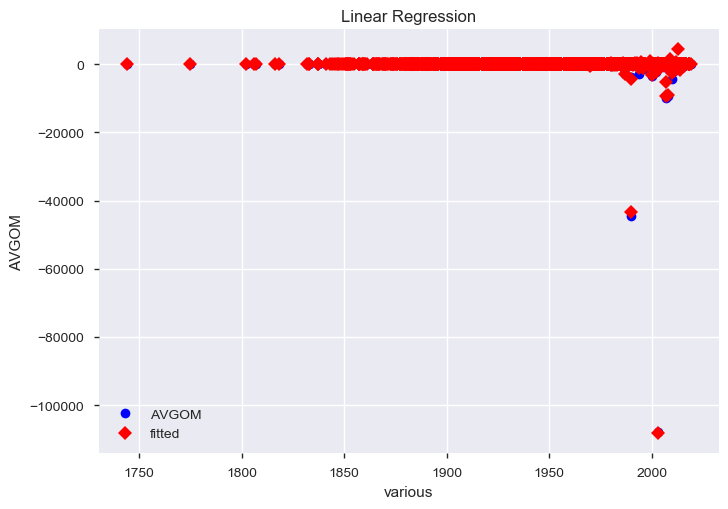

In [32]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, 0, ax=ax)
ax.set_ylabel("AVGOM")
ax.set_xlabel("various")
ax.set_title("Linear Regression")




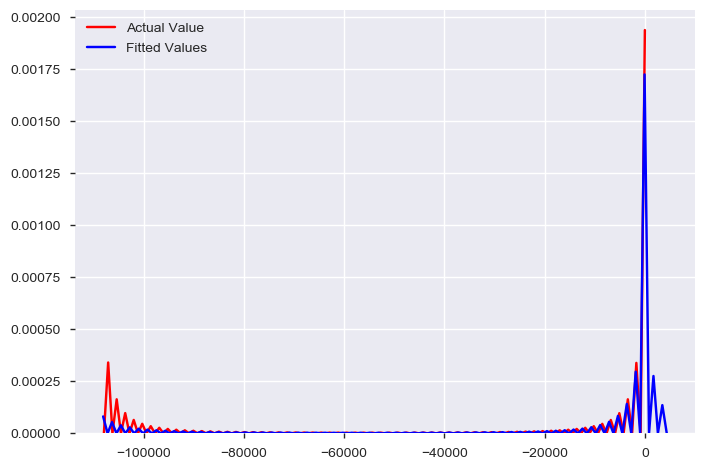

In [33]:
import seaborn as sns

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)

[17:03:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[8.5940780e-03 9.0168696e-03 6.3805172e-04 1.8858482e-05 5.9973065e-02
 6.5265119e-02 2.7794398e-03 1.6584303e-03 6.0038315e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.8221056e-04 7.0317404e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.7006674e-04 0.0000000e+00
 2.3824385e-04 2.7858783e-04 8.4878343e-01]


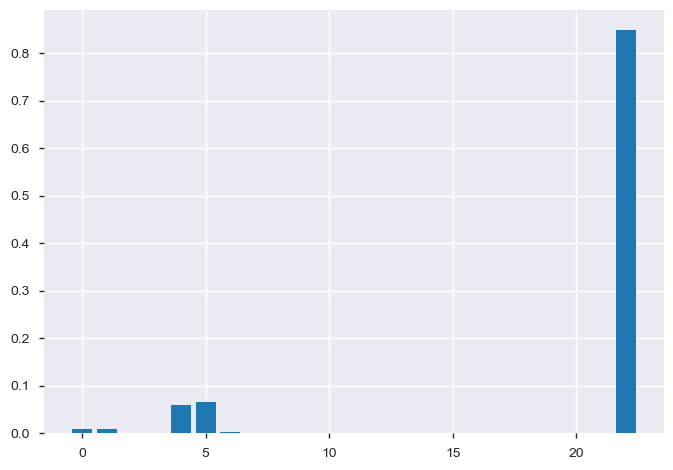

In [34]:
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot

model1 = XGBRegressor()
model1.fit(X, y)

print(model1.feature_importances_)

pyplot.bar(range(len(model1.feature_importances_)), model1.feature_importances_)
pyplot.show()

# EBITDA % is going to have high levels of covariance:  interdependencies.  EBIT = EBITDA - depreciation and amortization (basically, expensing depreciation assets, such as machinery costs).  However, interestingly, there seems to be some feature importance around Current Assets (Receivables, Inventories, etc.), Total Assets

# Let's look at clustering methods.  

In [35]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

cv = StratifiedKFold(n_splits=10)

clf = RandomForestRegressor(max_depth = 10,n_estimators=15,random_state=1)
clf.fit(X,y)
print(clf.feature_importances_)


[1.12555981e-04 1.21865895e-03 1.79144886e-02 1.42932649e-04
 1.23547985e-02 1.05835745e-03 2.36986831e-04 1.61736434e-04
 6.49989198e-02 7.94415351e-04 6.40445196e-05 1.92779217e-05
 4.41670563e-03 6.01502835e-05 6.58230886e-04 3.31918426e-04
 4.20097462e-05 1.07867387e-04 1.17682778e-01 4.35305180e-03
 5.37524630e-04 1.78183121e-04 7.72554407e-01]


In [36]:
clf.score(X,y)

0.8409572303292013

features = X
importances = clf.feature_importances_
#indices = np.argmatch(importances)

plt.title('Feature Importances')
plt.barh(range(len(importances)), importances[indices], color='b', align='center')
plt.yticks(range(len(importances),[features])
plt.xlabel('Relative Importance')
plt.show()

from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = df_imputed[['Pclass','Fare']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('Fare (normalized)'), plt.ylabel('Class')
plt.grid()
plt.title('Class Versus Fare')
plt.show()

In [37]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
#indices = np.arange(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances,
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.xticks(range(y.shape[1]), ('Founding','SIC','Employees','AVGTA','AVGCA','AVGTL','AVGLTD','AVGCL','AVGR','AVGEBITDA','AVGOI','AVGNI','AVGCashOp','AVGCashFin','AVGCAPEX','AVGCASHBEGIN','AVGCASHEND','AVGCASHYEAR','AVGGM','AVGCOS','AVGGP','AVGSGA','AVGEBITDAM')
plt.xlim([-1, y.shape[1]])
plt.show()

SyntaxError: invalid syntax (<ipython-input-37-56b66ee396cc>, line 14)

# DNN

In [38]:
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1", "/gpu:2"],
                                          cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

In [39]:
(X.shape, y.shape)

((5389, 23), (5389, 1))

In [40]:
with mirrored_strategy.scope():
    from sklearn.model_selection import train_test_split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

(4311, 23) (4311, 1)
(1078, 23) (1078, 1)


In [41]:

with mirrored_strategy.scope():
    X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [42]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4311, 23) (4311, 1)
(1078, 23) (1078, 1)


In [43]:
from tensorflow.keras import models
from tensorflow.keras import layers

with mirrored_strategy.scope():
    def build_model():
        # Because we will need to instantiate
        # the same model multiple times,
        # we use a function to construct it.
        model = models.Sequential()
        model.add(layers.Dense(64, activation='relu',
                               input_shape=(X_train.shape[1],)))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(1))
        model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
        return model

In [44]:
with mirrored_strategy.scope():
    k = 4
    num_val_samples = len(X_train) // k
    num_epochs = 100
    all_scores = []
    for i in range(k):
        print('processing fold #', i)
        # Prepare the validation data: data from partition # k
        val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

        # Prepare the training data: data from all other partitions
        partial_train_data = np.concatenate(
            [X_train[:i * num_val_samples],
             X_train[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [y_train[:i * num_val_samples],
             y_train[(i + 1) * num_val_samples:]],
            axis=0)

        # Build the Keras model (already compiled)
        model = build_model()
        # Train the model (in silent mode, verbose=0)
        model.fit(partial_train_data, partial_train_targets,
                  epochs=num_epochs, batch_size=1, verbose=0)
        # Evaluate the model on the validation data
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)

processing fold # 0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op LogicalNot in

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:2
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:2
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:2
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = hierarchical_copy, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/de

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:2
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:2
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:2
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Va

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:2
Executing op __inference_distributed_function_3897589 in device /job:localhost/replica:0/task:0/device:GPU:0


In [45]:
print(all_scores)
print(np.mean(all_scores))

[34266004.0, 26264456.0, 39069470.0, 28344888.0]
31986206.0


In [46]:
from tensorflow.keras import backend as K

# Some memory clean-up
K.clear_session()

In [ ]:
with mirrored_strategy.scope():
    
    k = 4
    num_val_samples = len(X_train) // k
    num_epochs = 500
    all_mae_histories = []
    for i in range(k):
        print('processing fold #', i)
        # Prepare the validation data: data from partition # k
        val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

        # Prepare the training data: data from all other partitions
        partial_train_data = np.concatenate(
            [X_train[:i * num_val_samples],
             X_train[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [y_train[:i * num_val_samples],
             y_train[(i + 1) * num_val_samples:]],
            axis=0)

        # Build the Keras model (already compiled)
        model = build_model()
        # Train the model (in silent mode, verbose=0)
        history = model.fit(partial_train_data, partial_train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=1, verbose=0)
        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
with mirrored_strategy.scope():

    # Get a fresh, compiled model.
    model = build_model()
    # Train it on the entirety of the data.
    model.fit(X_train, y_train,
              epochs=80, batch_size=16, verbose=0)
    test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

In [ ]:
test_mae_score

# PCA

# XGBOOST

In [ ]:

from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

In [ ]:
print(model)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))